<a href="https://colab.research.google.com/github/AndreiMoraru123/Optimization/blob/main/ImageRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

So far we explored several vanilla minimization mtehods. But we haven't yet looked into completing their potential. I'd like to introduce you in this notebook to a simple, fun (at least according to me) "image" (and note the quotation marks) algorithm.

Let's take a look at those "images":


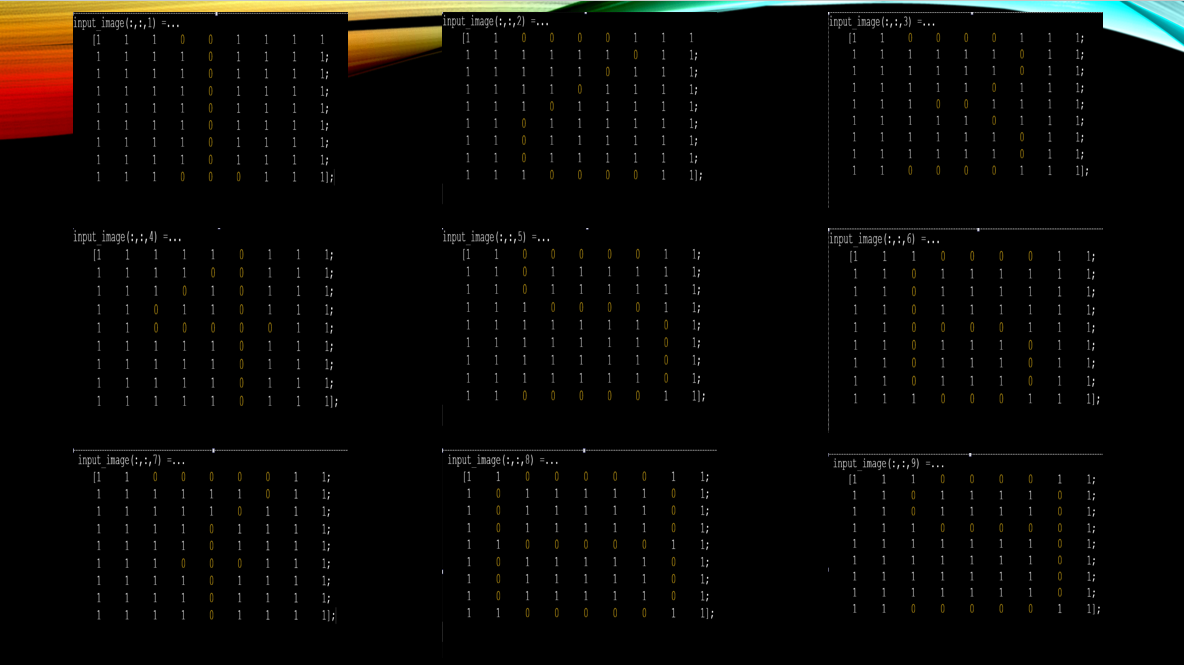



Can't see them yet? Let's light them up.

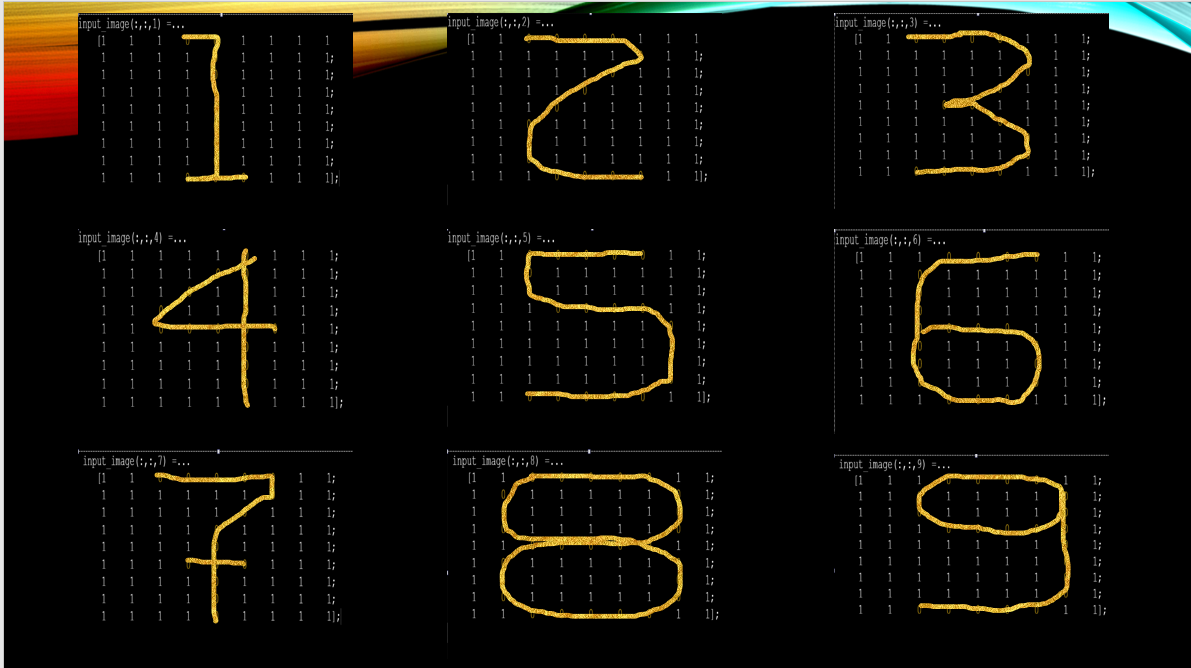

As you can see, the images I was talking about are essentially 2D matrixes of which a certain order or zeros (0's) inside the array resembles one of the 9 digits. You can think of them as gray scale images, in which the zeros are black and the ones around them are white. If you would define this problem for colorful images, you would have thrice the parameters to play around with (R,G,B)

As you may have noticed, not only the digits go up up 9, but the matrixes themselves are 9 by 9. In fact, there's a lot of nines here, almos like in a magic trick.

So let's see how the Artificial Neural Network architecture that I plan to solve this image classification proble with looks like:

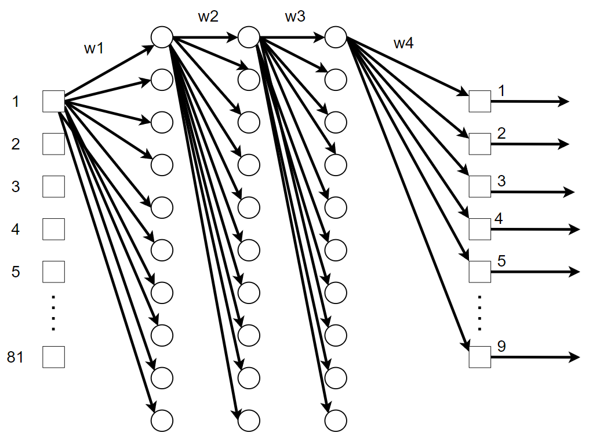


Take a close look at the number of inputs that go into the network, there are 81 of them, that is also the total size of one image matrix. That's right, we want to pass the whole image through the matrix. There are 9 outputs as well, the reason for this is that each index of the nine output vector should represent the correct guess of the one in nine digits tested.

The hidden layers in the middle are there to solve the nonlinearities (see the next text blocks). Now the number of the layers themselves (also called depth of network, I chose 3) or the number of the neurons per each hidden layer (also called breadth or width, I chose 45) are tuning parameters, and there is no correct answer for choosing them, at least in this specific problem. 



So we expect our output to look like this:

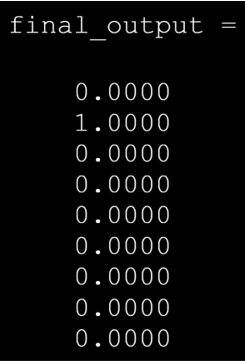

As per this example, two would be the correct answer, which gets calculated to be 1 (you will soon see how), and the others stay 0. Of course this is the ideal case, in reality we could have them as percentages of trust

What we want to do to validate the results is compare the computed outoput with a correct line of the known-truth-output, which can conveniently be represented also as a 9x9 diagonal matrix 

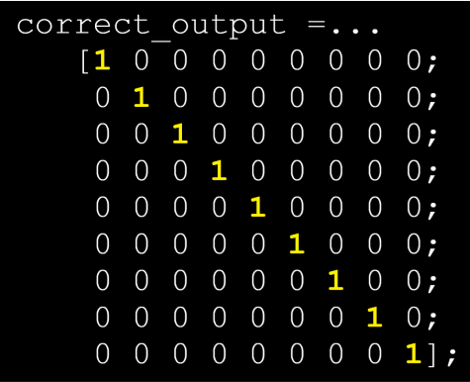

Basically, for each digit, its position in the matrix (so the diagonal) represent's its percentage (if numbers are between (0,99 %)) or certain validity
if you get either 0% or 100% (so 1 or 0). As this output is not linearly separable (you would need at least two parallel lines to separate the ones from the zeros), we cannot use the **sigmoid** activation function. Insead, we will use the **softmax** activation function 

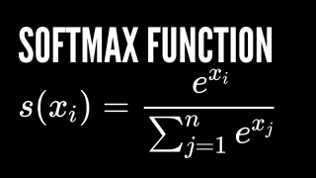

The math seems hairy, but it's essentially just a function that maps the output nicely between 0 and 1 

This is how we will train the last layer. Yet, if we only trained the last neuron, the hidden layers would be obsolete, hence we need an activation function for them as well, that will train them during back propagation (the 'feedback' round)

Enter the rectified linear unit activation function, or **ReLU**, a piecewise linear function 

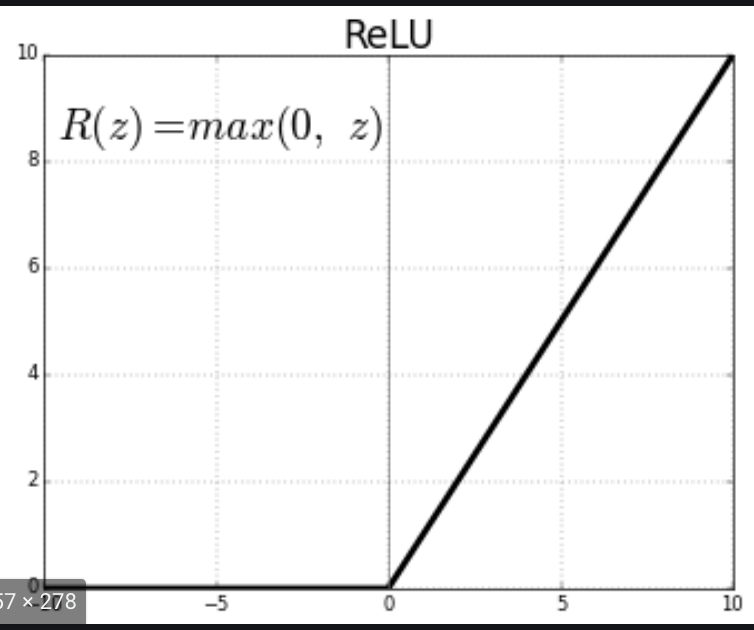

Now let's see some action!

And only with two modules!

In [1]:
import numpy as np
from matplotlib import pyplot as plt

Pick the digit you want to test. I chose 5 here

In [2]:
testing_image = [[1, 1, 0, 0, 0, 0, 0, 1, 1],
                 [1, 1, 0, 1, 1, 1, 1, 1, 1],
                 [1, 1, 0, 1, 1, 1, 1, 1, 1],
                 [1, 1, 1, 0, 0, 0, 0, 1, 1],
                 [1, 1, 1, 1, 1, 1, 1, 0, 1],
                 [1, 1, 1, 1, 1, 1, 1, 0, 1],
                 [1, 1, 1, 1, 1, 1, 1, 0, 1],
                 [1, 1, 1, 1, 1, 1, 1, 0, 1],
                 [1, 1, 0, 0, 0, 0, 0, 1, 1]]


The algorithm bellow is broken into training, testing, and one final forward pass

In [3]:
def DeepNN(testing_image):
    def NNtraining():
        def Softmax(x):
            e_x = np.exp(x - np.max(x))
            return e_x / e_x.sum()

        def ReLU(x):
            return np.maximum(0.0, x)

        def DeepLearning(w1, w2, w3, w4, input_image, correct_output):
            alpha = 0.001

            N = 9
            for k in range(N):
                reshaped_input_image = np.reshape(input_image[k], (81, 1))

                input_hidden_1 = np.dot(w1, reshaped_input_image)
                output_hidden_1 = ReLU(input_hidden_1)

                input_hidden_2 = np.dot(w2, output_hidden_1)
                output_hidden_2 = ReLU(input_hidden_2)

                input_hidden_3 = np.dot(w3, output_hidden_2)
                output_hidden_3 = ReLU(input_hidden_3)

                input_of_output = np.dot(w4, output_hidden_3)
                final_output = Softmax(input_of_output)

                correct_output_transpose = np.reshape(correct_output[k], (9, 1))
                error = correct_output_transpose - final_output

                delta = error

                error_of_hidden_3 = np.dot(np.reshape(w4, (45, 9)), delta)
                delta3 = np.multiply((input_hidden_3 > 0), error_of_hidden_3)

                error_of_hidden_2 = np.dot(np.reshape(w3, (45, 45)), delta3)
                delta2 = np.multiply((input_hidden_2 > 0), error_of_hidden_2)

                error_of_hidden_1 = np.dot(np.reshape(w2, (45, 45)), delta2)
                delta1 = np.multiply((input_hidden_1 > 0), error_of_hidden_1)

                adjustment_of_w4 = np.multiply(alpha, np.dot(delta, np.reshape(output_hidden_3, (1, 45))))
                adjustment_of_w3 = np.multiply(alpha, np.dot(delta3, np.reshape(output_hidden_2, (1, 45))))
                adjustment_of_w2 = np.multiply(alpha, np.dot(delta2, np.reshape(output_hidden_1, (1, 45))))
                adjustment_of_w1 = np.multiply(alpha, np.dot(delta1, np.reshape(reshaped_input_image, (1, 81))))

                w1 = w1 + adjustment_of_w1
                w2 = w2 + adjustment_of_w2
                w3 = w3 + adjustment_of_w3
                w4 = w4 + adjustment_of_w4
            return [w1, w2, w3, w4]

        n = 9
        input_image = [[[0 for k in range(n)] for j in range(n)] for i in range(n)]
        input_image[0] = [[1, 1, 1, 0, 0, 1, 1, 1, 1],
                          [1, 1, 1, 1, 0, 1, 1, 1, 1],
                          [1, 1, 1, 1, 0, 1, 1, 1, 1],
                          [1, 1, 1, 1, 0, 1, 1, 1, 1],
                          [1, 1, 1, 1, 0, 1, 1, 1, 1],
                          [1, 1, 1, 1, 0, 1, 1, 1, 1],
                          [1, 1, 1, 1, 0, 1, 1, 1, 1],
                          [1, 1, 1, 1, 0, 1, 1, 1, 1],
                          [1, 1, 1, 0, 0, 0, 1, 1, 1]]
        input_image[1] = [[1, 1, 0, 0, 0, 0, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 0, 1, 1],
                          [1, 1, 1, 1, 1, 0, 1, 1, 1],
                          [1, 1, 1, 1, 0, 1, 1, 1, 1],
                          [1, 1, 1, 0, 1, 1, 1, 1, 1],
                          [1, 1, 0, 1, 1, 1, 1, 1, 1],
                          [1, 1, 0, 1, 1, 1, 1, 1, 1],
                          [1, 1, 0, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 0, 0, 0, 0, 1, 1]]
        input_image[2] = [[1, 1, 0, 0, 0, 0, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 0, 1, 1],
                          [1, 1, 1, 1, 1, 1, 0, 1, 1],
                          [1, 1, 1, 1, 1, 0, 1, 1, 1],
                          [1, 1, 1, 0, 0, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 0, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 0, 1, 1],
                          [1, 1, 1, 1, 1, 1, 0, 1, 1],
                          [1, 1, 0, 0, 0, 0, 1, 1, 1]]
        input_image[3] = [[1, 1, 1, 1, 1, 0, 1, 1, 1],
                          [1, 1, 1, 1, 0, 0, 1, 1, 1],
                          [1, 1, 1, 0, 1, 0, 1, 1, 1],
                          [1, 1, 0, 1, 1, 0, 1, 1, 1],
                          [1, 1, 0, 0, 0, 0, 0, 1, 1],
                          [1, 1, 1, 1, 1, 0, 1, 1, 1],
                          [1, 1, 1, 1, 1, 0, 1, 1, 1],
                          [1, 1, 1, 1, 1, 0, 1, 1, 1],
                          [1, 1, 1, 1, 1, 0, 1, 1, 1]]
        input_image[4] = [[1, 1, 0, 0, 0, 0, 0, 1, 1],
                          [1, 1, 0, 1, 1, 1, 1, 1, 1],
                          [1, 1, 0, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 0, 0, 0, 0, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 0, 1],
                          [1, 1, 1, 1, 1, 1, 1, 0, 1],
                          [1, 1, 1, 1, 1, 1, 1, 0, 1],
                          [1, 1, 1, 1, 1, 1, 1, 0, 1],
                          [1, 1, 0, 0, 0, 0, 0, 1, 1]]
        input_image[5] = [[1, 1, 1, 0, 0, 0, 0, 1, 1],
                          [1, 1, 0, 1, 1, 1, 1, 1, 1],
                          [1, 1, 0, 1, 1, 1, 1, 1, 1],
                          [1, 1, 0, 1, 1, 1, 1, 1, 1],
                          [1, 1, 0, 0, 0, 0, 1, 1, 1],
                          [1, 1, 0, 1, 1, 1, 0, 1, 1],
                          [1, 1, 0, 1, 1, 1, 0, 1, 1],
                          [1, 1, 0, 1, 1, 1, 0, 1, 1],
                          [1, 1, 1, 0, 0, 0, 1, 1, 1]]
        input_image[6] = [[1, 1, 0, 0, 0, 0, 0, 1, 1],
                          [1, 1, 1, 1, 1, 1, 0, 1, 1],
                          [1, 1, 1, 1, 1, 0, 1, 1, 1],
                          [1, 1, 1, 1, 0, 1, 1, 1, 1],
                          [1, 1, 1, 1, 0, 1, 1, 1, 1],
                          [1, 1, 1, 0, 0, 0, 1, 1, 1],
                          [1, 1, 1, 1, 0, 1, 1, 1, 1],
                          [1, 1, 1, 1, 0, 1, 1, 1, 1],
                          [1, 1, 1, 1, 0, 1, 1, 1, 1]]
        input_image[7] = [[1, 1, 0, 0, 0, 0, 0, 1, 1],
                          [1, 0, 1, 1, 1, 1, 1, 0, 1],
                          [1, 0, 1, 1, 1, 1, 1, 0, 1],
                          [1, 0, 1, 1, 1, 1, 1, 0, 1],
                          [1, 1, 0, 0, 0, 0, 0, 1, 1],
                          [1, 0, 1, 1, 1, 1, 1, 0, 1],
                          [1, 0, 1, 1, 1, 1, 1, 0, 1],
                          [1, 0, 1, 1, 1, 1, 1, 0, 1],
                          [1, 1, 0, 0, 0, 0, 0, 1, 1]]
        input_image[8] = [[1, 1, 1, 0, 0, 0, 0, 1, 1],
                          [1, 1, 0, 1, 1, 1, 1, 0, 1],
                          [1, 1, 0, 1, 1, 1, 1, 0, 1],
                          [1, 1, 1, 0, 0, 0, 0, 0, 1],
                          [1, 1, 1, 1, 1, 1, 1, 0, 1],
                          [1, 1, 1, 1, 1, 1, 1, 0, 1],
                          [1, 1, 1, 1, 1, 1, 1, 0, 1],
                          [1, 1, 1, 1, 1, 1, 1, 0, 1],
                          [1, 1, 0, 0, 0, 0, 0, 1, 1]]

        correct_output = [[1, 0, 0, 0, 0, 0, 0, 0, 0],
                          [0, 1, 0, 0, 0, 0, 0, 0, 0],
                          [0, 0, 1, 0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 1, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 1, 0, 0, 0, 0],
                          [0, 0, 0, 0, 0, 1, 0, 0, 0],
                          [0, 0, 0, 0, 0, 0, 1, 0, 0],
                          [0, 0, 0, 0, 0, 0, 0, 1, 0],
                          [0, 0, 0, 0, 0, 0, 0, 0, 1]]

        w1 = 2 * np.random.random((45, 81)) - 1
        w2 = 2 * np.random.random((45, 45)) - 1
        w3 = 2 * np.random.random((45, 45)) - 1
        w4 = 2 * np.random.random((9, 45)) - 1

        for epoch in range(20000):
            [w1, w2, w3, w4] = DeepLearning(w1, w2, w3, w4, input_image, correct_output)

        return w1, w2, w3, w4

    def NNtesting(w1, w2, w3, w4, testing_image):
        def Softmax(x):
            e_x = np.exp(x - np.max(x))
            return e_x / e_x.sum()

        def ReLU(x):
            return np.maximum(0.0, x)

        reshaped_input_image = np.reshape(testing_image, (81, 1))

        input_hidden_1 = np.dot(w1, reshaped_input_image)
        output_hidden_1 = ReLU(input_hidden_1)

        input_hidden_2 = np.dot(w2, output_hidden_1)
        output_hidden_2 = ReLU(input_hidden_2)

        input_hidden_3 = np.dot(w3, output_hidden_2)
        output_hidden_3 = ReLU(input_hidden_3)

        input_of_output = np.dot(w4, output_hidden_3)
        final_output = Softmax(input_of_output)
        correct_ans = np.argmax(final_output) + 1
        return correct_ans

    [w1, w2, w3, w4] = NNtraining()
    answer = NNtesting(w1, w2, w3, w4, testing_image)
    plt.rcParams["figure.figsize"] = [7.00, 3.50]
    plt.rcParams["figure.autolayout"] = True
    x = [answer]
    y = [answer]
    plt.xlim(0, 9)
    plt.ylim(0, 9)
    plt.grid()
    plt.plot(x, y, marker="o", markersize=20, markeredgecolor="red", markerfacecolor="green")
    plt.show()

Let's call for an answer (This may take up to a minute to train).

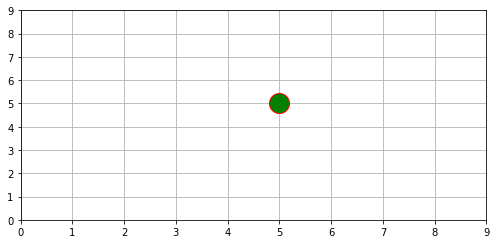

In [4]:
answer = DeepNN(testing_image)

Neat. Our NN guessed right. Feel free to play around with this 🤖